# Part 1

**Importing Relevant Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import math

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AvgPool2D, BatchNormalization, Reshape, Activation, MaxPool2D, PReLU
from tensorflow.keras.callbacks import LambdaCallback, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.initializers import Constant
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K


from sklearn.model_selection import train_test_split

%matplotlib inline

**Loading Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img_folder = "/content/drive/MyDrive/midas/train"

**Reading Data**

In [5]:
IMG_SIZE = 64
def generate_training_data(img_folder):
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.IMREAD_GRAYSCALE)
            image=cv2.resize(image, (IMG_SIZE, IMG_SIZE),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [6]:
img_data, class_name = generate_training_data(img_folder)

**Preprocessing Data**

In [7]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
final_img_data = np.array(img_data, np.float32).reshape(-1, 64, 64, 1)
y = np.array(list(map(int,target_val)), np.float32)

In [ ]:
df = pd.DataFrame((np.array(img_data).reshape(-1,64*64)))

In [ ]:
df['label'] = target_val
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7


In [ ]:
#Displaying all the classes
classes = sorted(df["label"].unique())
classes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61]

In [ ]:
#Counting the number of images per class
label_counts = df["label"].value_counts()

hovertemplate = "Class: %{x}<br>Count: %{y}"

colors = ["#d6d6d6"]*len(classes)
colors[0] = "#EF553B"
colors[9] = "#636EFA"

data = [
    go.Bar(x=label_counts.index, y=label_counts.values, hovertemplate=hovertemplate, name="", marker_color=colors)
]

title = go.layout.Title(text="Count of images of classes",
                        font=dict(size=25))

hoverlabel = go.layout.Hoverlabel(bgcolor="#000",
                           font=dict(color="#fff"))

layout = go.Layout(template="plotly_dark",
                  xaxis=dict(tickvals=classes, ticks="outside", ticklen=5, tickfont=dict(size=14), title=dict(text="classes", font=dict(size=17))),
                  yaxis=dict(tickvals=list(range(0, 5000, 500)), ticks="outside", ticklen=5, title=dict(text="Count", font=dict(size=15))),
                  title=title,
                  hoverlabel=hoverlabel)

figure = go.Figure(data=data, layout=layout)
figure.show()

In [ ]:
#Checking for null data
df.isnull().sum().unique()

array([0])

In [ ]:
labels = df.pop("label").tolist()

In [ ]:
#encoding labels to categorical data
encoded_labels = to_categorical(labels)
encoded_labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0

In [ ]:
#Generating a DataFrame of the data
data_reshaped = df.values.reshape(-1, 64, 64, 1)

In [ ]:
#Verifying whether the data was normalized.
print(f"Min: {data_reshaped.min()}")
print(f"Max: {data_reshaped.max()}")

Min: 0.0
Max: 1.0


**CNN Architecture Selection Experiments**

In [ ]:
#Splitting into Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(data_reshaped, encoded_labels, test_size = 0.2)

print(f"Train Data Shape: {X_train.shape}")
print(f"Validation Data Shape: {X_test.shape}")



Train Data Shape: (1984, 64, 64, 1)
Validation Data Shape: (496, 64, 64, 1)


In [31]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

**Number of Layers**


---
Checking for one, two, three pairs of convolutions. 




In [ ]:
model_nets = 3
model = [0] * model_nets
names = ["One Pair", "Two Pairs", "Three Pairs"]

for j in range(3):
    model[j] = models.Sequential()
    model[j].add(Conv2D(32,kernel_size=3,padding='same',activation='relu',
            input_shape=(64,64,1)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(128,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))

    model[j].add(Flatten())
    model[j].add(Dense(512, activation='relu'))
    
    model[j].add(Dense(62, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = [0] *model_nets
epochs = 30
for j in range(model_nets):
    history[j] = model[j].fit(X_train,y_train, batch_size=32, epochs = epochs, 
        validation_data = (X_test,y_test), verbose=1)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

Epoch 1/30
62/62 [==============================] - 31s 9ms/step - loss: 6.6510 - accuracy: 0.0219 - val_loss: 4.1549 - val_accuracy: 0.0101
Epoch 2/30
62/62 [==============================] - 0s 6ms/step - loss: 4.0929 - accuracy: 0.0232 - val_loss: 4.1071 - val_accuracy: 0.0262
Epoch 3/30
62/62 [==============================] - 0s 6ms/step - loss: 3.9339 - accuracy: 0.0608 - val_loss: 3.9002 - val_accuracy: 0.0847
Epoch 4/30
62/62 [==============================] - 0s 6ms/step - loss: 3.5986 - accuracy: 0.1427 - val_loss: 3.5652 - val_accuracy: 0.1371
Epoch 5/30
62/62 [==============================] - 0s 6ms/step - loss: 3.1328 - accuracy: 0.2307 - val_loss: 3.1570 - val_accuracy: 0.1956
Epoch 6/30
62/62 [==============================] - 0s 6ms/step - loss: 2.6736 - accuracy: 0.3090 - val_loss: 2.9684 - val_accuracy: 0.2399
Epoch 7/30
62/62 [==============================] - 0s 6ms/step - loss: 2.2417 - accuracy: 0.4268 - val_loss: 2.8472 - val_accuracy: 0.3044
Epoch 8/30
62/62 [=

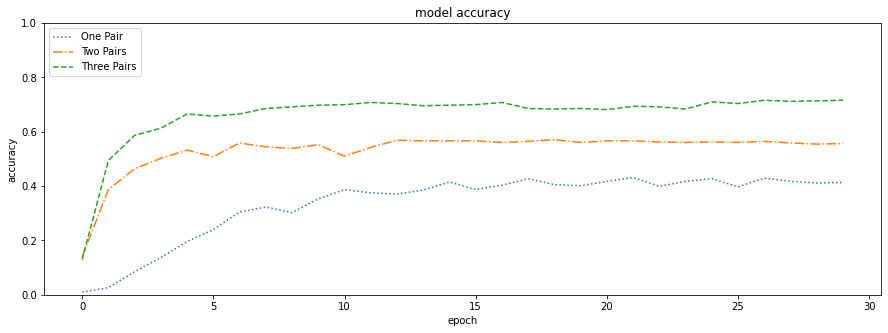

In [ ]:
#Displaying the Results

plt.figure(figsize=(15,5))
for i in range(model_nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

**Result**

As we can see from the above experiments, it would be best to use three pairs of convolution-subsampling for the given dataset.

**Number of Filters**

---
Iterating through different values of filters for the best combination.


In [ ]:
conv_nets = 6
model_2 = [0] *conv_nets
for j in range(6):
    model_2[j] = models.Sequential()
    model_2[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(64,64,1)))
    model_2[j].add(MaxPool2D())
    model_2[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model_2[j].add(MaxPool2D())
    model_2[j].add(Conv2D(j*32+32,kernel_size=5,activation='relu'))
    model_2[j].add(MaxPool2D())
    model_2[j].add(Flatten())
    model_2[j].add(Dense(512, activation='relu'))
    model_2[j].add(Dense(62, activation='softmax'))
    model_2[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = [0] * conv_nets
names = ["(8, 16, 32)","(16, 32, 64)","(24, 48, 96)","(32, 64, 128)","(40, 70, 160)","(48, 86, 196)"]
epochs = 30
for j in range(conv_nets):
    history[j] = model_2[j].fit(X_train,y_train, batch_size=32, epochs = epochs, 
        validation_data = (X_test,y_test), verbose=1)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

Epoch 1/30
62/62 [==============================] - 1s 7ms/step - loss: 4.1366 - accuracy: 0.0217 - val_loss: 3.9074 - val_accuracy: 0.0645
Epoch 2/30
62/62 [==============================] - 0s 4ms/step - loss: 3.4118 - accuracy: 0.1692 - val_loss: 2.5487 - val_accuracy: 0.3306
Epoch 3/30
62/62 [==============================] - 0s 4ms/step - loss: 1.9505 - accuracy: 0.4625 - val_loss: 1.9292 - val_accuracy: 0.5242
Epoch 4/30
62/62 [==============================] - 0s 4ms/step - loss: 1.2649 - accuracy: 0.6561 - val_loss: 1.6880 - val_accuracy: 0.5383
Epoch 5/30
62/62 [==============================] - 0s 4ms/step - loss: 0.8385 - accuracy: 0.7598 - val_loss: 1.5661 - val_accuracy: 0.5907
Epoch 6/30
62/62 [==============================] - 0s 4ms/step - loss: 0.5230 - accuracy: 0.8503 - val_loss: 1.6564 - val_accuracy: 0.5827
Epoch 7/30
62/62 [==============================] - 0s 4ms/step - loss: 0.4287 - accuracy: 0.8723 - val_loss: 1.6542 - val_accuracy: 0.6250
Epoch 8/30
62/62 [==

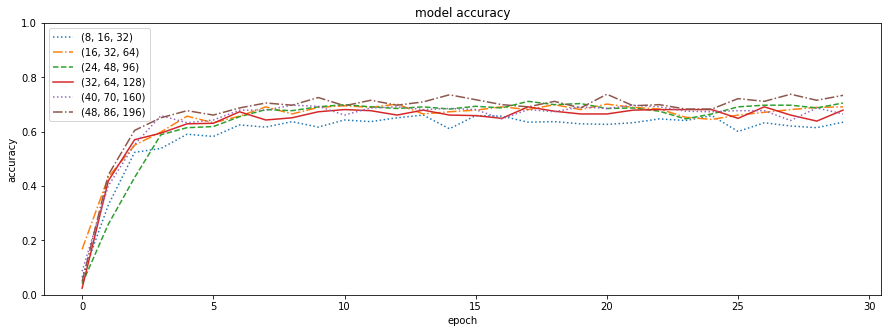

In [ ]:
#Displaying the results

plt.figure(figsize=(15,5))
for i in range(conv_nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

**Result**

We can see that the filters `(16,32,64)` provide us with an output with accuracy comparable to that of higher number of filters. Hence using more filters won't be worth the additional computational cost



**Dense Layer Size**


---
Checking how many dense layers to use, from 0 to 2048



In [ ]:
conv_nets = 8
model_3 = [0] *conv_nets

for j in range(8):
    model_3[j] = models.Sequential()
    model_3[j].add(Conv2D(16,kernel_size=5,activation='relu',input_shape=(64,64,1)))
    model_3[j].add(MaxPool2D())
    model_3[j].add(Conv2D(32,kernel_size=5,activation='relu'))
    model_3[j].add(MaxPool2D())
    model_3[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model_3[j].add(MaxPool2D())
    model_3[j].add(Flatten())
    if j>0:
        model_3[j].add(Dense(2**(j+4), activation='relu'))
    model_3[j].add(Dense(62, activation='softmax'))
    model_3[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = [0] * conv_nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 30
for j in range(conv_nets):
    history[j] = model_3[j].fit(X_train,y_train, batch_size=32, epochs = epochs, 
        validation_data = (X_test,y_test), verbose=1)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

Epoch 1/30
62/62 [==============================] - 1s 7ms/step - loss: 4.1191 - accuracy: 0.0272 - val_loss: 3.7287 - val_accuracy: 0.1089
Epoch 2/30
62/62 [==============================] - 0s 5ms/step - loss: 3.2126 - accuracy: 0.2106 - val_loss: 2.4453 - val_accuracy: 0.3589
Epoch 3/30
62/62 [==============================] - 0s 5ms/step - loss: 1.8855 - accuracy: 0.4928 - val_loss: 1.7696 - val_accuracy: 0.5403
Epoch 4/30
62/62 [==============================] - 0s 5ms/step - loss: 1.2152 - accuracy: 0.6477 - val_loss: 1.6275 - val_accuracy: 0.6008
Epoch 5/30
62/62 [==============================] - 0s 5ms/step - loss: 0.7682 - accuracy: 0.7839 - val_loss: 1.5876 - val_accuracy: 0.5948
Epoch 6/30
62/62 [==============================] - 0s 5ms/step - loss: 0.5411 - accuracy: 0.8443 - val_loss: 1.6758 - val_accuracy: 0.6069
Epoch 7/30
62/62 [==============================] - 0s 5ms/step - loss: 0.3976 - accuracy: 0.8802 - val_loss: 1.6563 - val_accuracy: 0.6028
Epoch 8/30
62/62 [==

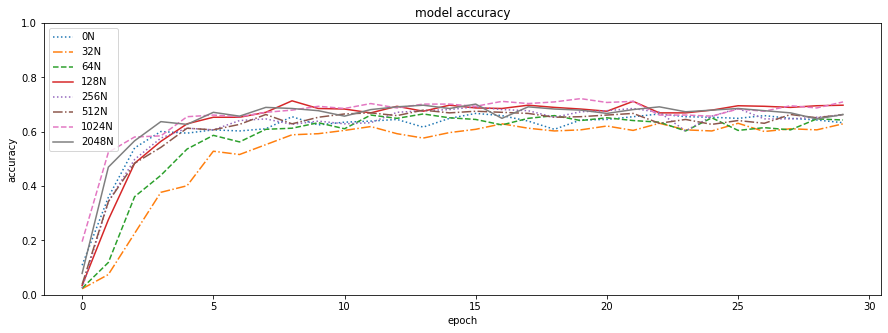

In [ ]:
#Displaying the results

plt.figure(figsize=(15,5))
for i in range(conv_nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

**Result**



Hence we will use `128` neurons in the Dense layer before the classification

In [ ]:
conv_nets = 8
model_dropout = [0] *conv_nets

for j in range(8):
    model_dropout[j] = models.Sequential()
    model_dropout[j].add(Conv2D(16,kernel_size=5,activation='relu',input_shape=(64,64,1)))
    model_dropout[j].add(MaxPool2D())
    model_dropout[j].add(Dropout(j*0.1))
    model_dropout[j].add(Conv2D(32,kernel_size=5,activation='relu'))
    model_dropout[j].add(MaxPool2D())
    model_dropout[j].add(Dropout(j*0.1))
    model_dropout[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model_dropout[j].add(MaxPool2D())
    model_dropout[j].add(Dropout(j*0.1))
    model_dropout[j].add(Flatten())
    model_dropout[j].add(Dense(128, activation='relu'))
    model_dropout[j].add(Dense(62, activation='softmax'))
    model_dropout[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = [0] * conv_nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 30
for j in range(conv_nets):
    history[j] = model_dropout[j].fit(X_train,y_train, batch_size=32, epochs = epochs, 
        validation_data = (X_test,y_test), verbose=1)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

Epoch 1/30
62/62 [==============================] - 0s 6ms/step - loss: 0.0565 - accuracy: 0.9834 - val_loss: 2.5098 - val_accuracy: 0.6129
Epoch 2/30
62/62 [==============================] - 0s 5ms/step - loss: 0.0944 - accuracy: 0.9708 - val_loss: 2.0764 - val_accuracy: 0.6452
Epoch 3/30
62/62 [==============================] - 0s 6ms/step - loss: 0.0767 - accuracy: 0.9773 - val_loss: 2.1079 - val_accuracy: 0.6673
Epoch 4/30
62/62 [==============================] - 0s 5ms/step - loss: 0.0562 - accuracy: 0.9839 - val_loss: 2.0881 - val_accuracy: 0.6351
Epoch 5/30
62/62 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9879 - val_loss: 2.2474 - val_accuracy: 0.6411
Epoch 6/30
62/62 [==============================] - 0s 5ms/step - loss: 0.0373 - accuracy: 0.9889 - val_loss: 2.4829 - val_accuracy: 0.6431
Epoch 7/30
62/62 [==============================] - 0s 5ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 2.1661 - val_accuracy: 0.6694
Epoch 8/30
62/62 [==

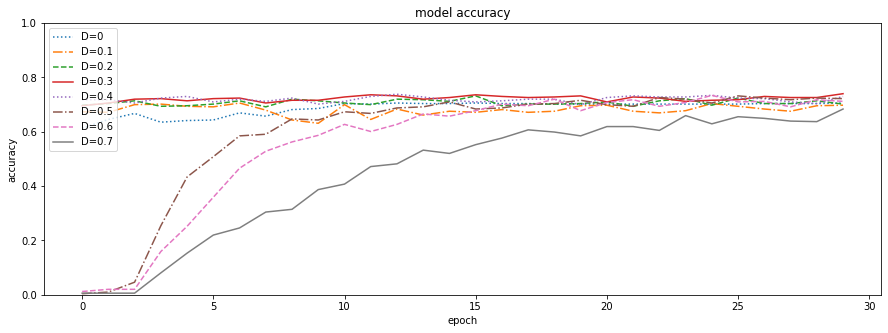

In [ ]:
#Displaying the results

plt.figure(figsize=(15,5))
for i in range(conv_nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

**Result**

We use Dropout as `40%`


---

---





Performance of current model

In [ ]:
    model_current = models.Sequential()
    model_current.add(Conv2D(16,kernel_size=5,activation='relu',input_shape=(64,64,1)))
    model_current.add(MaxPool2D())
    model_current.add(Dropout(0.3))
    model_current.add(Conv2D(32,kernel_size=5,activation='relu'))
    model_current.add(MaxPool2D())
    model_current.add(Dropout(0.3))
    model_current.add(Conv2D(64,kernel_size=5,activation='relu'))
    model_current.add(MaxPool2D())
    model_current.add(Dropout(0.3))
    model_current.add(Flatten())
    model_current.add(Dense(128, activation='relu'))
    model_current.add(Dense(62, activation='softmax'))
    model_current.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model_current.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
62/62 [==============================] - 1s 8ms/step - loss: 4.1548 - accuracy: 0.0157 - val_loss: 4.1274 - val_accuracy: 0.0181
Epoch 2/30
62/62 [==============================] - 0s 5ms/step - loss: 4.1097 - accuracy: 0.0298 - val_loss: 3.9369 - val_accuracy: 0.0403
Epoch 3/30
62/62 [==============================] - 0s 5ms/step - loss: 3.5973 - accuracy: 0.1193 - val_loss: 2.6594 - val_accuracy: 0.2944
Epoch 4/30
62/62 [==============================] - 0s 5ms/step - loss: 2.3599 - accuracy: 0.3648 - val_loss: 1.8443 - val_accuracy: 0.5000
Epoch 5/30
62/62 [==============================] - 0s 5ms/step - loss: 1.7223 - accuracy: 0.4967 - val_loss: 1.5813 - val_accuracy: 0.5746
Epoch 6/30
62/62 [==============================] - 0s 5ms/step - loss: 1.3160 - accuracy: 0.5971 - val_loss: 1.3979 - val_accuracy: 0.5988
Epoch 7/30
62/62 [==============================] - 0s 5ms/step - loss: 1.1064 - accuracy: 0.6621 - val_loss: 1.3514 - val_accuracy: 0.6129
Epoch 8/30
62/62 [==

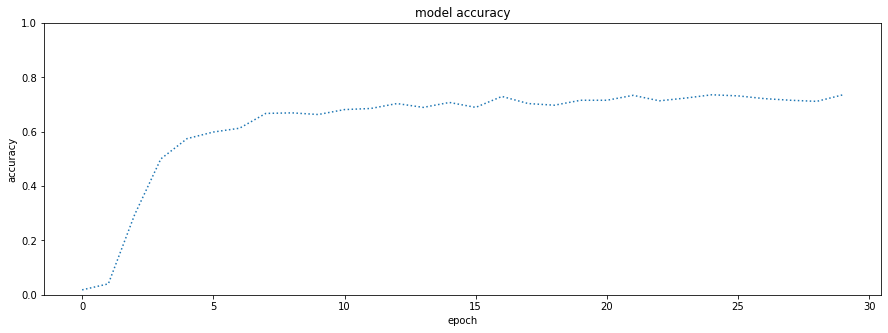

In [ ]:
#Checking the performance

plt.figure(figsize=(15,5))

plt.plot(history.history['val_accuracy'],linestyle=styles[0])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

**Data Augmentation**

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
    model_data_augmentation = models.Sequential()
    model_data_augmentation.add(Conv2D(16,kernel_size=5,activation='relu',input_shape=(64,64,1)))
    model_data_augmentation.add(MaxPool2D())
    model_data_augmentation.add(Dropout(0.3))
    model_data_augmentation.add(Conv2D(32,kernel_size=5,activation='relu'))
    model_data_augmentation.add(MaxPool2D())
    model_data_augmentation.add(Dropout(0.3))
    model_data_augmentation.add(Conv2D(64,kernel_size=5,activation='relu'))
    model_data_augmentation.add(MaxPool2D())
    model_data_augmentation.add(Dropout(0.3))
    model_data_augmentation.add(Flatten())
    model_data_augmentation.add(Dense(128, activation='relu'))
    model_data_augmentation.add(Dense(62, activation='softmax'))
    model_data_augmentation.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [ ]:
history_data_augmentation = model_data_augmentation.fit(datagen.flow(X_train, y_train, batch_size=32), epochs = 30, steps_per_epoch=len(X_train) / 32, validation_data = (X_test,y_test))

Epoch 1/30
62/62 [==============================] - 2s 20ms/step - loss: 4.1426 - acc: 0.0122 - val_loss: 4.1277 - val_acc: 0.0101
Epoch 2/30
62/62 [==============================] - 1s 17ms/step - loss: 4.1182 - acc: 0.0214 - val_loss: 4.0829 - val_acc: 0.0282
Epoch 3/30
62/62 [==============================] - 1s 17ms/step - loss: 4.0318 - acc: 0.0358 - val_loss: 3.6049 - val_acc: 0.1008
Epoch 4/30
62/62 [==============================] - 1s 17ms/step - loss: 3.7118 - acc: 0.0920 - val_loss: 2.8980 - val_acc: 0.2419
Epoch 5/30
62/62 [==============================] - 1s 17ms/step - loss: 3.0899 - acc: 0.2027 - val_loss: 2.3250 - val_acc: 0.3770
Epoch 6/30
62/62 [==============================] - 1s 17ms/step - loss: 2.5914 - acc: 0.2764 - val_loss: 1.8349 - val_acc: 0.5121
Epoch 7/30
62/62 [==============================] - 1s 17ms/step - loss: 2.2025 - acc: 0.4008 - val_loss: 1.4924 - val_acc: 0.5605
Epoch 8/30
62/62 [==============================] - 1s 17ms/step - loss: 1.9452 - a

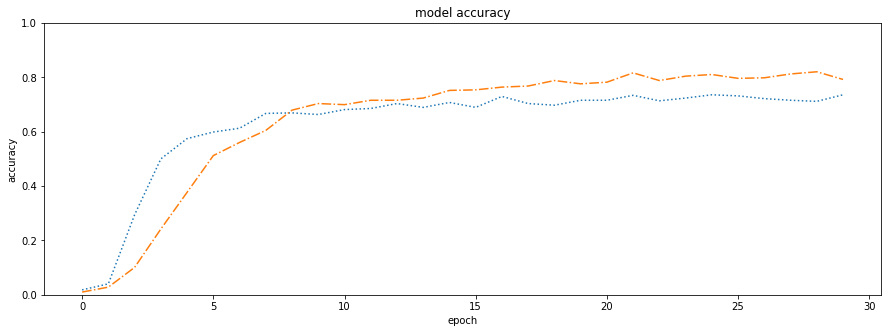

In [ ]:
#Displaying the results 

plt.figure(figsize=(15,5))

plt.plot(history.history['val_accuracy'],linestyle=styles[0])
plt.plot(history_data_augmentation.history['val_acc'],linestyle=styles[1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

**Result**

As we can see, the accuracy increases by using data augmentation, hence we add it to the final CNN architecture.

**Finding the optimal adaptive Learning Rate**




---
The method described in the 2019 paper "A novel adaptive learning rate scheduler for deep neural networks." by Yedida, Rahul, and Snehanshu Saha. A novel method to compute the learning rate for training deep neural networks with stochastic gradient descent. We first derive a theoretical framework to compute learning rates dynamically based on the Lipschitz constant of the loss function.



In [ ]:
tf.compat.v1.disable_eager_execution()

model_learning_rate = models.Sequential()
model_learning_rate.add(Conv2D(16, kernel_size=5,activation='relu',kernel_initializer='he_normal',input_shape=(64,64,1)))
model_learning_rate.add(MaxPool2D())
model_learning_rate.add(Dropout(0.3))
model_learning_rate.add(Conv2D(32, kernel_size=5, activation='relu',padding='same',kernel_initializer='he_normal'))
model_learning_rate.add(MaxPool2D())
model_learning_rate.add(Dropout(0.3))
model_learning_rate.add(Conv2D(64, kernel_size=5, activation='relu',padding='same',kernel_initializer='he_normal'))
model_learning_rate.add(Dropout(0.3))
model_learning_rate.add(Flatten())
model_learning_rate.add(Dense(128, activation='relu'))
model_learning_rate.add(Dense(62, activation='softmax'))

model_learning_rate.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 60, 60, 16)        416       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 30, 30, 32)        12832     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 15, 15, 64)      

In [ ]:
func = K.function([model_learning_rate.layers[0].input], [model_learning_rate.layers[-2].output])

In [ ]:
batch_size = 32
num_classes = 62
epochs = 30
img_rows, img_cols = 64, 64
lrs=[]

In [ ]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (1984, 64, 64, 1)
1984 train samples
496 test samples


In [ ]:
K1 = 0.
K2 = 0.
beta1 = 0.9
beta2 = 0.999

In [ ]:
def lr_schedule(epoch, lr):
    """Learning Rate Schedule
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    global K1, K2

    Kz = 0.
    S = 0.
    
    sess = tf.compat.v1.keras.backend.get_session()
    max_wt = 0.
    for weight in model_learning_rate.weights:
        norm = np.linalg.norm(weight.eval(sess))
        if norm > max_wt:
            max_wt = norm
    
    for i in range((len(X_train) - 1) // batch_size + 1):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = X_train[start_i:end_i]
    	
        tmp = np.array(func([xb]))
        activ = np.linalg.norm(tmp)
        sq = np.linalg.norm(np.square(tmp))

        if sq > S:
            S = sq
        
        if activ > Kz:
            Kz = activ

    K_ = ((num_classes - 1) * Kz) / (num_classes * batch_size)
    S_ = (num_classes - 1) ** 2 / (num_classes * batch_size) ** 2 * S 
    
    K1 = beta1 * K1 + (1 - beta1) * K_
    K2 = beta2 * K2 + (1 - beta2) * S_

    lr = (np.sqrt(K2) + K.epsilon()) / K1
    print('S =', S, ', K1 =', K1,', K2 =', K2, ', K_ =', K_, ', lr =', lr)
    lrs.append(lr)
    print('Epoch', epoch, 'LR =', lr)
    return lr

In [ ]:
lr_scheduler = LearningRateScheduler(lr_schedule)

In [ ]:
model_learning_rate.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
datagen1 = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=15,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen1.fit(X_train)

In [ ]:
history=model_learning_rate.fit(datagen1.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])

S = 65.94718 , K1 = 0.12591038173244842 , K2 = 6.234082923262045e-05 , K_ = 1.2591038173244846 , lr = 0.06270905370137758
Epoch 0 LR = 0.06270905370137758
Epoch 1/30
62/62 [==============================] - 2s 20ms/step - batch: 30.5000 - size: 32.0000 - loss: 66.4133 - accuracy: 0.0161 - val_loss: 4.1615 - val_accuracy: 0.0060


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



S = 0.0 , K1 = 0.11331934355920359 , K2 = 6.227848840338783e-05 , K_ = 0.0 , lr = 0.06964187969908954
Epoch 1 LR = 0.06964187969908954
Epoch 2/30
62/62 [==============================] - 1s 18ms/step - batch: 30.5000 - size: 32.0000 - loss: 4.1535 - accuracy: 0.0131 - val_loss: 4.1519 - val_accuracy: 0.0161
S = 0.0 , K1 = 0.10198740920328324 , K2 = 6.221620991498444e-05 , K_ = 0.0 , lr = 0.0773411672122122
Epoch 2 LR = 0.0773411672122122
Epoch 3/30
62/62 [==============================] - 1s 18ms/step - batch: 30.5000 - size: 32.0000 - loss: 4.1553 - accuracy: 0.0096 - val_loss: 4.1687 - val_accuracy: 0.0141
S = 0.0 , K1 = 0.09178866828295491 , K2 = 6.215399370506946e-05 , K_ = 0.0 , lr = 0.08589165271833618
Epoch 3 LR = 0.08589165271833618
Epoch 4/30
62/62 [==============================] - 1s 18ms/step - batch: 30.5000 - size: 32.0000 - loss: 4.1571 - accuracy: 0.0081 - val_loss: 4.1629 - val_accuracy: 0.0040
S = 0.0 , K1 = 0.08260980145465942 , K2 = 6.209183971136439e-05 , K_ = 0.0 

**Result**

We can see that using the Lipschitz-inspired Adaptive Learning Rate doesn't improve accuracy, instead the accuracy oscillates about a small value. So using this adaptive learning rate for optimisation of the loss function won't help us in our case.

**Using Parameterized ReLu**


---
This method is decribed in  the paper "Parameterised Sigmoid and ReLU Hidden Activation Functions for DNN Acoustic Modelling" by C. Zhang & P. C. Woodland. Introducing a learnable parameter for the ReLU activation function fixes the dying ReLU problem as it doesn't have zero-slope parts. It also speeds up training. 




In [ ]:
model_parameterised_ReLU = models.Sequential()
model_parameterised_ReLU.add(Conv2D(16, kernel_size=5, activation='relu', input_shape=(64,64,1)))
model_parameterised_ReLU.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_parameterised_ReLU.add(MaxPool2D())
model_parameterised_ReLU.add(Dropout(0.3))
model_parameterised_ReLU.add(Conv2D(32, kernel_size=5,activation='relu'))
model_parameterised_ReLU.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_parameterised_ReLU.add(MaxPool2D())
model_parameterised_ReLU.add(Dropout(0.3))
model_parameterised_ReLU.add(Conv2D(64, kernel_size=5,activation='relu'))
model_parameterised_ReLU.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_parameterised_ReLU.add(Dropout(0.3))
model_parameterised_ReLU.add(Flatten())
model_parameterised_ReLU.add(Dense(128))
model_parameterised_ReLU.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_parameterised_ReLU.add(Dense(62, activation='softmax'))

model_parameterised_ReLU.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 60, 60, 16)        416       
_________________________________________________________________
p_re_lu_16 (PReLU)           (None, 60, 60, 16)        57600     
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 26, 26, 32)        12832     
_________________________________________________________________
p_re_lu_17 (PReLU)           (None, 26, 26, 32)        21632     
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 13, 13, 32)      

In [ ]:
model_parameterised_ReLU.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_parameterised_ReLU = model_parameterised_ReLU.fit(datagen.flow(X_train, y_train, batch_size=32), epochs = 30, steps_per_epoch=len(X_train) / 32, validation_data = (X_test,y_test))

Epoch 1/30
62/62 [==============================] - ETA: 0s - batch: 30.5000 - size: 32.0000 - loss: 4.1383 - accuracy: 0.0151

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



62/62 [==============================] - 2s 24ms/step - batch: 30.5000 - size: 32.0000 - loss: 4.1383 - accuracy: 0.0151 - val_loss: 4.1288 - val_accuracy: 0.0040
Epoch 2/30
62/62 [==============================] - 1s 18ms/step - batch: 30.5000 - size: 32.0000 - loss: 4.1276 - accuracy: 0.0166 - val_loss: 4.1300 - val_accuracy: 0.0081
Epoch 3/30
62/62 [==============================] - 1s 20ms/step - batch: 30.5000 - size: 32.0000 - loss: 4.1279 - accuracy: 0.0161 - val_loss: 4.1312 - val_accuracy: 0.0081
Epoch 4/30
62/62 [==============================] - 1s 20ms/step - batch: 30.5000 - size: 32.0000 - loss: 4.0718 - accuracy: 0.0353 - val_loss: 3.7993 - val_accuracy: 0.0746
Epoch 5/30
62/62 [==============================] - 1s 20ms/step - batch: 30.5000 - size: 32.0000 - loss: 3.6707 - accuracy: 0.0988 - val_loss: 3.1375 - val_accuracy: 0.2097
Epoch 6/30
62/62 [==============================] - 1s 20ms/step - batch: 30.5000 - size: 32.0000 - loss: 3.1507 - accuracy: 0.1925 - val_los

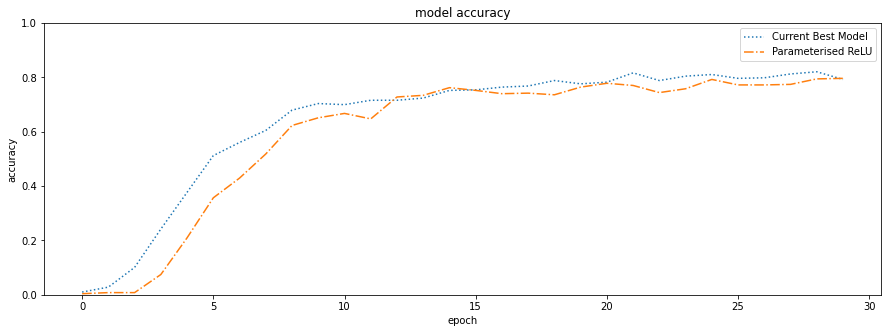

In [ ]:
#Displaying the results 

plt.figure(figsize=(15,5))

plt.plot(history_data_augmentation.history['val_acc'],linestyle=styles[0], label="Current Best Model")
plt.plot(history_parameterised_ReLU.history['val_accuracy'],linestyle=styles[1], label = "Parameterised ReLU")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

**Result**

Hence we use Parameterised ReLU as it improves accuracy.

---



**Batch Normalisation**


---
Batch normalization (also known as batch norm) is a method used to make artificial neural networks faster and more stable through normalization of the input layer by re-centering and re-scaling. It was proposed by Sergey Ioffe and Christian Szegedy in 2015 in the paper titled "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift". Using batch normalization learning becomes efficient also it can be used as regularization to avoid overfitting of the model. The layer is added to the sequential model to standardize the input or the outputs. It can be used at several points in between the layers of the model. It is often placed just after defining the sequential model and after the convolution and pooling layers.





In [ ]:
model_batch_normalisation = models.Sequential()
model_batch_normalisation.add(Conv2D(16, kernel_size=5,kernel_initializer='he_normal',input_shape=(64,64,1)))
model_batch_normalisation.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_batch_normalisation.add(MaxPool2D())
model_batch_normalisation.add(Dropout(0.3))
model_batch_normalisation.add(Conv2D(32, kernel_size=5,padding='same',kernel_initializer='he_normal'))
model_batch_normalisation.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_batch_normalisation.add(BatchNormalization())
model_batch_normalisation.add(MaxPool2D())
model_batch_normalisation.add(Dropout(0.3))
model_batch_normalisation.add(Conv2D(64, kernel_size=5,padding='same',kernel_initializer='he_normal'))
model_batch_normalisation.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_batch_normalisation.add(Dropout(0.3))
model_batch_normalisation.add(Flatten())
model_batch_normalisation.add(Dense(128))
model_batch_normalisation.add(BatchNormalization())
model_batch_normalisation.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_batch_normalisation.add(Dense(62, activation='softmax'))

model_batch_normalisation.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 60, 60, 16)        416       
_________________________________________________________________
p_re_lu_4 (PReLU)            (None, 60, 60, 16)        57600     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 30, 30, 32)        12832     
_________________________________________________________________
p_re_lu_5 (PReLU)            (None, 30, 30, 32)        28800     
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)      

In [ ]:
model_batch_normalisation.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_batch_normalisation = model_batch_normalisation.fit(datagen.flow(X_train, y_train, batch_size=32), epochs = 30, steps_per_epoch=len(X_train) / 32, validation_data = (X_test,y_test))

Epoch 1/30
60/62 [============================>.] - ETA: 0s - batch: 29.5000 - size: 32.0000 - loss: 4.1861 - accuracy: 0.0464

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



62/62 [==============================] - 3s 25ms/step - batch: 30.5000 - size: 32.0000 - loss: 4.1800 - accuracy: 0.0479 - val_loss: 4.9009 - val_accuracy: 0.0121
Epoch 2/30
62/62 [==============================] - 1s 21ms/step - batch: 30.5000 - size: 32.0000 - loss: 3.5880 - accuracy: 0.1099 - val_loss: 4.2558 - val_accuracy: 0.0081
Epoch 3/30
62/62 [==============================] - 1s 23ms/step - batch: 30.5000 - size: 32.0000 - loss: 3.2978 - accuracy: 0.1865 - val_loss: 3.2232 - val_accuracy: 0.2500
Epoch 4/30
62/62 [==============================] - 1s 23ms/step - batch: 30.5000 - size: 32.0000 - loss: 2.8148 - accuracy: 0.2858 - val_loss: 2.9193 - val_accuracy: 0.2540
Epoch 5/30
62/62 [==============================] - 1s 22ms/step - batch: 30.5000 - size: 32.0000 - loss: 2.4512 - accuracy: 0.3841 - val_loss: 2.6318 - val_accuracy: 0.3185
Epoch 6/30
62/62 [==============================] - 1s 22ms/step - batch: 30.5000 - size: 32.0000 - loss: 2.1788 - accuracy: 0.4567 - val_los

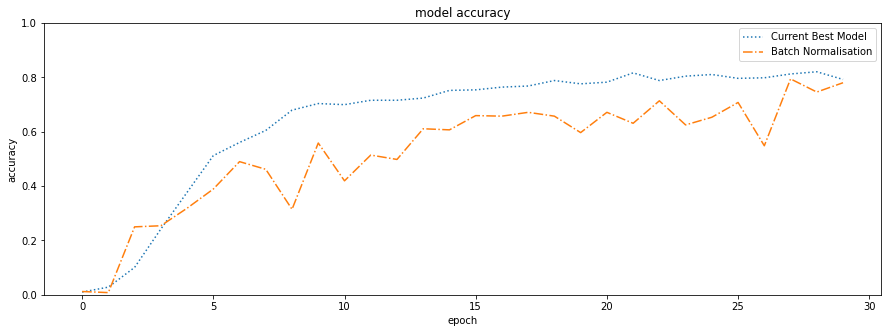

In [ ]:
#Displaying the results 

plt.figure(figsize=(15,5))

plt.plot(history_data_augmentation.history['val_acc'],linestyle=styles[0], label="Current Best Model")
plt.plot(history_batch_normalisation.history['val_accuracy'],linestyle=styles[1], label = "Batch Normalisation")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

**Result**

We observe that the validation accuracy tends to oscillate a lot and also the test accuracy remains lower from other models. Hence we don't use Batch Normalization.

Using ReduceLROnPlateau

In [ ]:
model_learning_rate_plateau = models.Sequential()
model_learning_rate_plateau.add(Conv2D(16, kernel_size=5, activation='relu', input_shape=(64,64,1)))
model_learning_rate_plateau.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_learning_rate_plateau.add(MaxPool2D())
model_learning_rate_plateau.add(Dropout(0.3))
model_learning_rate_plateau.add(Conv2D(32, kernel_size=5,activation='relu'))
model_learning_rate_plateau.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_learning_rate_plateau.add(MaxPool2D())
model_learning_rate_plateau.add(Dropout(0.3))
model_learning_rate_plateau.add(Conv2D(64, kernel_size=5,activation='relu'))
model_learning_rate_plateau.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_learning_rate_plateau.add(Dropout(0.3))
model_learning_rate_plateau.add(Flatten())
model_learning_rate_plateau.add(Dense(128))
model_learning_rate_plateau.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_learning_rate_plateau.add(Dense(62, activation='softmax'))

model_learning_rate_plateau.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 60, 60, 16)        416       
_________________________________________________________________
p_re_lu_20 (PReLU)           (None, 60, 60, 16)        57600     
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 26, 26, 32)        12832     
_________________________________________________________________
p_re_lu_21 (PReLU)           (None, 26, 26, 32)        21632     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 13, 13, 32)      

In [ ]:
model_learning_rate_plateau.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

In [ ]:
history_learning_rate_plateau = model_learning_rate_plateau.fit(datagen.flow(X_train, y_train, batch_size=32), epochs = 30, steps_per_epoch=len(X_train) / 32, validation_data = (X_test,y_test))

Epoch 1/30
61/62 [============================>.] - ETA: 0s - batch: 30.0000 - size: 32.0000 - loss: 4.1344 - accuracy: 0.0149

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



62/62 [==============================] - 3s 25ms/step - batch: 30.5000 - size: 32.0000 - loss: 4.1343 - accuracy: 0.0151 - val_loss: 4.1288 - val_accuracy: 0.0081
Epoch 2/30
62/62 [==============================] - 1s 19ms/step - batch: 30.5000 - size: 32.0000 - loss: 4.1272 - accuracy: 0.0166 - val_loss: 4.1270 - val_accuracy: 0.0161
Epoch 3/30
62/62 [==============================] - 1s 21ms/step - batch: 30.5000 - size: 32.0000 - loss: 4.0762 - accuracy: 0.0312 - val_loss: 3.8855 - val_accuracy: 0.0423
Epoch 4/30
62/62 [==============================] - 1s 20ms/step - batch: 30.5000 - size: 32.0000 - loss: 3.6487 - accuracy: 0.0983 - val_loss: 3.0965 - val_accuracy: 0.1976
Epoch 5/30
62/62 [==============================] - 1s 20ms/step - batch: 30.5000 - size: 32.0000 - loss: 2.8490 - accuracy: 0.2414 - val_loss: 2.2110 - val_accuracy: 0.4052
Epoch 6/30
62/62 [==============================] - 1s 20ms/step - batch: 30.5000 - size: 32.0000 - loss: 2.2596 - accuracy: 0.3785 - val_los

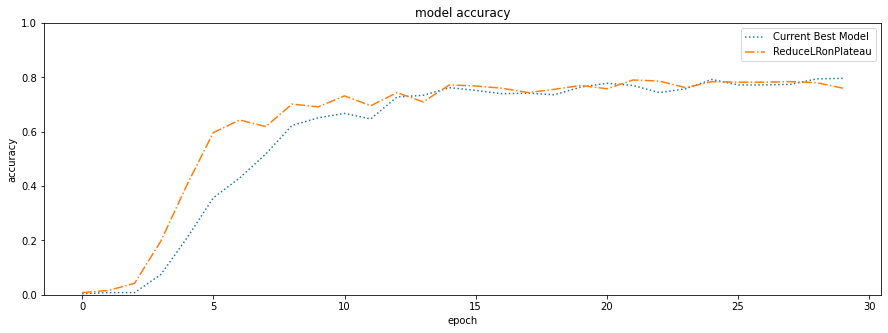

In [ ]:
#Displaying the results 

plt.figure(figsize=(15,5))

plt.plot(history_parameterised_ReLU.history['val_accuracy'],linestyle=styles[0], label="Current Best Model")
plt.plot(history_learning_rate_plateau.history['val_accuracy'],linestyle=styles[1], label = "ReduceLRonPlateau")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

**Result**

Hence we can also use the ReduceLROnPlateau function for better training of the model.

# **Final Model**

In [ ]:
model_final = models.Sequential()
model_final.add(Conv2D(16, kernel_size=5, activation='relu', input_shape=(64,64,1)))
model_final.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_final.add(MaxPool2D())
model_final.add(Dropout(0.3))
model_final.add(Conv2D(32, kernel_size=5,activation='relu'))
model_final.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_final.add(MaxPool2D())
model_final.add(Dropout(0.3))
model_final.add(Conv2D(64, kernel_size=5,activation='relu'))
model_final.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_final.add(Dropout(0.3))
model_final.add(Flatten())
model_final.add(Dense(128))
model_final.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_final.add(Dense(62, activation='softmax'))

model_final.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 60, 60, 16)        416       
_________________________________________________________________
p_re_lu_12 (PReLU)           (None, 60, 60, 16)        57600     
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 26, 26, 32)        12832     
_________________________________________________________________
p_re_lu_13 (PReLU)           (None, 26, 26, 32)        21632     
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 13, 13, 32)      

Model Plot

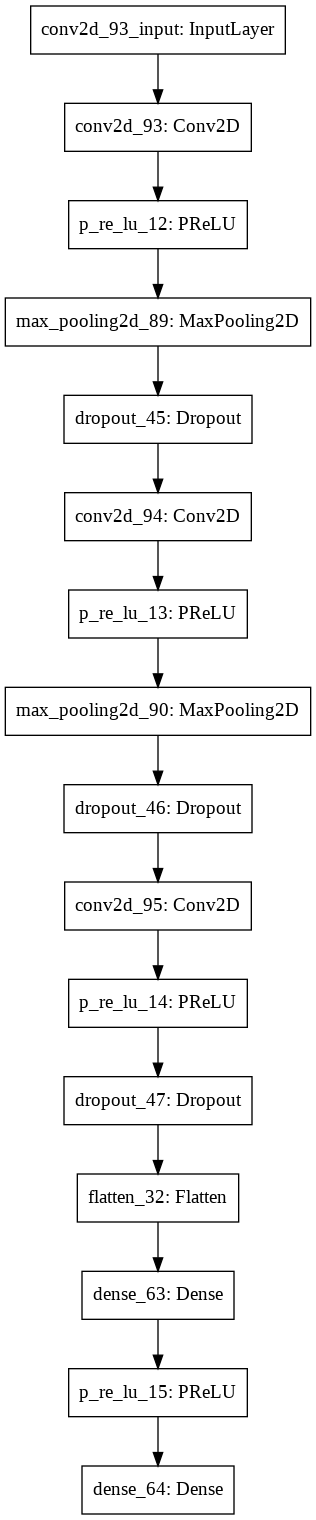

In [ ]:
tf.keras.utils.plot_model(model_final)

In [ ]:
model_final.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
variable_learning_rate_final = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

In [ ]:
#Recombining the Train-Test Splits
X_combined = np.r_[X_train, X_test]
y_combined = np.r_[y_train, y_test]

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

datagen.fit(X_combined)

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history_final = model_final.fit(datagen.flow(X_combined, y_combined, batch_size=32), epochs = 50, steps_per_epoch=len(X_combined) / 32, callbacks=[cp_callback])

Epoch 1/50
77/77 [============================>.] - ETA: 0s - batch: 38.0000 - size: 31.7922 - loss: 4.1013 - accuracy: 0.0261
Epoch 00001: saving model to training_1/cp.ckpt
77/77 [==============================] - 2s 20ms/step - batch: 38.5000 - size: 31.7949 - loss: 4.0969 - accuracy: 0.0270
Epoch 2/50
77/77 [============================>.] - ETA: 0s - batch: 38.0000 - size: 31.7922 - loss: 3.6920 - accuracy: 0.0989
Epoch 00002: saving model to training_1/cp.ckpt
77/77 [==============================] - 2s 20ms/step - batch: 38.5000 - size: 31.7949 - loss: 3.6872 - accuracy: 0.0996
Epoch 3/50
77/77 [============================>.] - ETA: 0s - batch: 38.0000 - size: 31.7922 - loss: 2.9976 - accuracy: 0.2230
Epoch 00003: saving model to training_1/cp.ckpt
77/77 [==============================] - 2s 20ms/step - batch: 38.5000 - size: 31.7949 - loss: 2.9925 - accuracy: 0.2242
Epoch 4/50
76/77 [============================>.] - ETA: 0s - batch: 37.5000 - size: 31.7895 - loss: 2.2312 - ac

In [ ]:
model_final.save("final_model.h5")

# Part 2

In [8]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
final_img_data = np.array(img_data, np.float32).reshape(-1, 64, 64, 1)
y = np.array(list(map(int,target_val)), np.float32)

In [9]:
df = pd.DataFrame((np.array(img_data).reshape(-1,64*64)))

In [10]:
df['label'] = target_val
valid_labels = [np.linspace(0, 9, num=10,dtype='int')]
df = df[df['label'].isin([0,1,2,3,4,5,6,7,8,9])]
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7


In [11]:
#Displaying all the classes
classes = sorted(df["label"].unique())
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
labels = df.pop("label").tolist()

In [13]:
#encoding labels to categorical data
encoded_labels = to_categorical(labels)
encoded_labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [14]:
#Generating a DataFrame of the data
data_reshaped = df.values.reshape(-1, 64, 64, 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_reshaped, encoded_labels, test_size = 0.2)
X_combined = np.r_[X_train, X_test]
y_combined = np.r_[y_train, y_test]


In [16]:
model_final = models.Sequential()
model_final.add(Conv2D(16, kernel_size=5, activation='relu', input_shape=(64,64,1)))
model_final.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_final.add(MaxPool2D())
model_final.add(Dropout(0.3))
model_final.add(Conv2D(32, kernel_size=5,activation='relu'))
model_final.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_final.add(MaxPool2D())
model_final.add(Dropout(0.3))
model_final.add(Conv2D(64, kernel_size=5,activation='relu'))
model_final.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_final.add(Dropout(0.3))
model_final.add(Flatten())
model_final.add(Dense(128))
model_final.add(PReLU(alpha_initializer=Constant(value=0.25)))
model_final.add(Dense(10, activation='softmax'))

model_final.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 16)        416       
_________________________________________________________________
p_re_lu (PReLU)              (None, 60, 60, 16)        57600     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        12832     
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 26, 26, 32)        21632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0

In [17]:
model_final.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
variable_learning_rate_final = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

In [19]:
datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

datagen.fit(X_combined)

In [20]:
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history_final = model_final.fit(datagen.flow(X_combined, y_combined, batch_size=32), epochs = 50, steps_per_epoch=len(X_combined) / 32, callbacks=[cp_callback])

Epoch 1/50
12/12 [==============================] - 33s 31ms/step - loss: 2.3404 - accuracy: 0.0838

Epoch 00001: saving model to training_2/cp.ckpt
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 2.3022 - accuracy: 0.1092

Epoch 00002: saving model to training_2/cp.ckpt
Epoch 3/50
12/12 [==============================] - 0s 18ms/step - loss: 2.2941 - accuracy: 0.1132

Epoch 00003: saving model to training_2/cp.ckpt
Epoch 4/50
12/12 [==============================] - 0s 19ms/step - loss: 2.2245 - accuracy: 0.2172

Epoch 00004: saving model to training_2/cp.ckpt
Epoch 5/50
12/12 [==============================] - 0s 20ms/step - loss: 1.9839 - accuracy: 0.3030

Epoch 00005: saving model to training_2/cp.ckpt
Epoch 6/50
12/12 [==============================] - 0s 19ms/step - loss: 1.7464 - accuracy: 0.4135

Epoch 00006: saving model to training_2/cp.ckpt
Epoch 7/50
12/12 [==============================] - 0s 19ms/step - loss: 1.7501 - accuracy: 0.4270

Epoch 00007

In [21]:
model_final.save("model2.h5")

In [22]:
model_pretrained1 = models.load_model("model2.h5")
model_random_initialization1 = models.load_model("model2.h5")

In [23]:
for i in range(15):
  model_pretrained1.layers[i].trainable = False


k1 = model_pretrained1.layers[14].output
k1 = Dense(128)(k1)
k1 = Dense(10,activation="softmax")(k1)

new_model_pretrained1 = models.Model(inputs=model_pretrained1.input,outputs=k1)

k2 = model_random_initialization1.layers[14].output
k2 = Dense(128)(k2)
k2 = Dense(10,activation="softmax")(k2)

new_model_scratch1 = models.Model(inputs=model_random_initialization1.input,outputs=k2)

In [24]:
#Model metrics calculations
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [25]:
new_model_pretrained1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m, recall_m])
new_model_scratch1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [26]:
from tensorflow.keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_new = []
for img in X_train:
    X_train_new.append(cv2.resize(img,(64,64)))
X_test_new = []
for img in X_test:
    X_test_new.append(cv2.resize(img,(64,64)))

X_train = np.array(X_train_new)
X_test = np.array(X_test_new)
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

11493376/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 64, 64), y=(60000,)
Test: X=(10000, 64, 64), y=(10000,)


In [27]:
history_pretrained1 = new_model_pretrained1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3005 - accuracy: 0.1119 - f1_m: 9.7258 - precision_m: 1399990770.5586 - recall_m: 4.8636
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2926 - accuracy: 0.1197 - f1_m: 9.6558 - precision_m: 1313898127.7612 - recall_m: 4.8375
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2893 - accuracy: 0.1212 - f1_m: 9.6408 - precision_m: 1288091151.2154 - recall_m: 4.8327
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2864 - accuracy: 0.1229 - f1_m: 9.6800 - precision_m: 1273402588.5885 - recall_m: 4.8558
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2829 - accuracy: 0.1252 - f1_m: 9.6598 - precision_m: 1237497408.7164 - recall_m: 4.8497
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2828 - accuracy: 0.1251 - f1_m: 9.6576 - precision_m: 1269379112.8017 - recall_m: 4.844

In [28]:
history_scratch1 = new_model_scratch1.fit(X_train, y_train, , validation_data=(X_test, y_test), epochs = 30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 1.1152 - accuracy: 0.5419 - f1_m: 4.7564 - precision_m: 263469872.8657 - recall_m: 2.8781
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0857 - accuracy: 0.9789 - f1_m: 1.0064 - precision_m: 0.9606 - recall_m: 1.0590
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0521 - accuracy: 0.9859 - f1_m: 0.9810 - precision_m: 0.9354 - recall_m: 1.0332
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0433 - accuracy: 0.9887 - f1_m: 0.9752 - precision_m: 0.9291 - recall_m: 1.0281
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0349 - accuracy: 0.9912 - f1_m: 0.9694 - precision_m: 0.9231 - recall_m: 1.0225
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0358 - accuracy: 0.9900 - f1_m: 0.9716 - precision_m: 0.9257 - recall_m: 1.0243
Epoch 7/30
1875/1875 [================

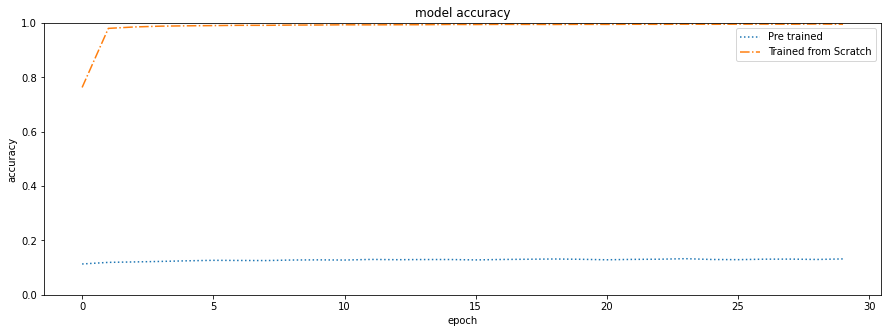

In [32]:
#Plot Accuracies

plt.figure(figsize=(15,5))

plt.plot(history_pretrained1.history['accuracy'],linestyle=styles[0], label="Pre trained")
plt.plot(history_scratch1.history['accuracy'],linestyle=styles[1], label = "Trained from Scratch")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()


In [35]:
# evaluate the pre trained model
loss, accuracy, f1_score, precision, recall = new_model_pretrained1.evaluate(X_test, y_test, verbose=0)
print('loss is ',loss)
print('accuracy is ',accuracy)
print('f1_score is ',f1_score)
print('precision is ',precision)
print('recall is ',recall)

loss is  2.264644145965576
accuracy is  0.11140000075101852
f1_score is  9.5263032913208
precision is  1253897728.0
recall is  4.781377792358398


In [36]:
# evaluate the model trained from scratch
loss, accuracy, f1_score, precision, recall = new_model_scratch1.evaluate(X_test, y_test, verbose=0)
print('loss is ',loss)
print('accuracy is ',accuracy)
print('f1_score is ',f1_score)
print('precision is ',precision)
print('recall is ',recall)

loss is  0.03529360890388489
accuracy is  0.9930999875068665
f1_score is  0.9567144513130188
precision is  0.9109296202659607
recall is  1.0088772773742676


# Part 3


In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_new = []
for img in X_train:
    X_train_new.append(cv2.resize(img,(64,64)))
X_test_new = []
for img in X_test:
    X_test_new.append(cv2.resize(img,(64,64)))

X_train = np.array(X_train_new)
X_test = np.array(X_test_new)
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Train: X=(60000, 64, 64), y=(60000,)
Test: X=(10000, 64, 64), y=(10000,)


In [39]:
model_pretrained = models.load_model("final_model.h5")
model_random_initialization = models.load_model('final_model.h5')

In [40]:
len(model_pretrained.layers)

15

In [41]:
for i in range(15):
  model_pretrained.layers[i].trainable = False


ll = model_pretrained.layers[14].output
ll = Dense(128)(ll)
ll = Dense(10,activation="softmax")(ll)

new_model_pretrained = models.Model(inputs=model_pretrained.input,outputs=ll)

l2 = model_random_initialization.layers[14].output
l2 = Dense(128)(l2)
l2 = Dense(10,activation="softmax")(l2)

new_model_scratch = models.Model(inputs=model_random_initialization.input,outputs=l2)


In [42]:
new_model_pretrained.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m, recall_m])
new_model_scratch.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [43]:
history_pretrained = new_model_pretrained.fit(X_train, y_train, epochs = 50, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 2.2542 - accuracy: 0.1468 - f1_m: 9.5613 - precision_m: 1271308287.7271 - recall_m: 4.7953 - val_loss: 2.2166 - val_accuracy: 0.1660 - val_f1_m: 9.3845 - val_precision_m: 1241214080.0000 - val_recall_m: 4.7109
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2106 - accuracy: 0.1708 - f1_m: 9.1931 - precision_m: 1101984664.6652 - recall_m: 4.6274 - val_loss: 2.2052 - val_accuracy: 0.1821 - val_f1_m: 9.1886 - val_precision_m: 1176357632.0000 - val_recall_m: 4.6191
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1996 - accuracy: 0.1801 - f1_m: 9.1243 - precision_m: 974175804.7079 - recall_m: 4.6089 - val_loss: 2.1990 - val_accuracy: 0.1723 - val_f1_m: 8.8707 - val_precision_m: 1098594432.0000 - val_recall_m: 4.4650
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1913 - accuracy: 0.1838 - f1_m: 9.0913 - precision_m: 957348400.8

In [44]:
history_scratch = new_model_scratch.fit(X_train, y_train, epochs = 50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 1.0876 - accuracy: 0.5381 - f1_m: 4.2716 - precision_m: 248533916.3156 - recall_m: 2.5858 - val_loss: 0.0735 - val_accuracy: 0.9828 - val_f1_m: 0.9924 - val_precision_m: 0.9480 - val_recall_m: 1.0430
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0892 - accuracy: 0.9780 - f1_m: 0.9901 - precision_m: 0.9464 - recall_m: 1.0400 - val_loss: 0.0456 - val_accuracy: 0.9895 - val_f1_m: 0.9770 - val_precision_m: 0.9323 - val_recall_m: 1.0277
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0604 - accuracy: 0.9842 - f1_m: 0.9780 - precision_m: 0.9332 - recall_m: 1.0291 - val_loss: 0.0451 - val_accuracy: 0.9876 - val_f1_m: 0.9765 - val_precision_m: 0.9308 - val_recall_m: 1.0286
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0503 - accuracy: 0.9868 - f1_m: 0.9747 - precision_m: 0.9286 - recall_m: 1.0274 - val_loss: 0.0287 - val_a

We can see that the pretrained model takes around half the time than the model trained from scratch to train.

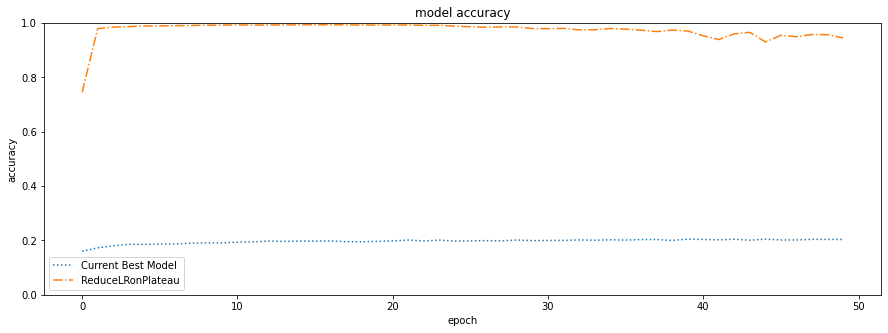

In [45]:
#Displaying the results 

plt.figure(figsize=(15,5))

plt.plot(history_pretrained.history['val_accuracy'],linestyle=styles[0], label="Current Best Model")
plt.plot(history_scratch.history['val_accuracy'],linestyle=styles[1], label = "ReduceLRonPlateau")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

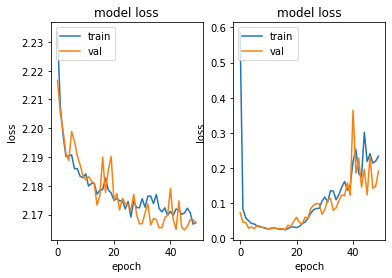

In [46]:
#Test vs Validation Loss of the models
plt.subplot(1, 2, 1)
plt.plot(history_pretrained.history['loss'])
plt.plot(history_pretrained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_scratch.history['loss'])
plt.plot(history_scratch.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

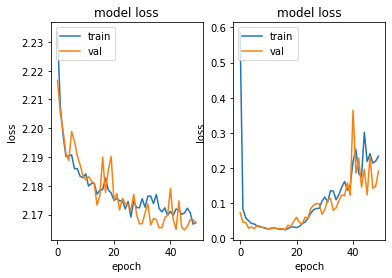

In [47]:
#Test vs Validation Loss of the models
plt.subplot(1, 2, 1)
plt.plot(history_pretrained.history['loss'])
plt.plot(history_pretrained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_scratch.history['loss'])
plt.plot(history_scratch.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [49]:
# evaluate the pre trained model
loss, accuracy, f1_score, precision, recall = new_model_pretrained1.evaluate(X_test, y_test, verbose=0)
print('loss is ',loss)
print('accuracy is ',accuracy)
print('f1_score is ',f1_score)
print('precision is ',precision)
print('recall is ',recall)

loss is  2.264644145965576
accuracy is  0.11140000075101852
f1_score is  9.5263032913208
precision is  1253897728.0
recall is  4.781377792358398


In [50]:
# evaluate the model trained from scratch
loss, accuracy, f1_score, precision, recall = new_model_scratch1.evaluate(X_test, y_test, verbose=0)
print('loss is ',loss)
print('accuracy is ',accuracy)
print('f1_score is ',f1_score)
print('precision is ',precision)
print('recall is ',recall)

loss is  0.03529360890388489
accuracy is  0.9930999875068665
f1_score is  0.9567144513130188
precision is  0.9109296202659607
recall is  1.0088772773742676


In this dataset, the images have the characters and digits in white pixels, while the background has black colour. Mainly this is the cause for the poor performance of the pre-trained model.